### Data analysis
##### Data set: Total global fertility and life expactancy

### 1. Explore data

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
fert = pd.read_csv('../data/gapminder_total_fertility.csv', index_col=0)
print(fert.shape)

(260, 216)


In [134]:
life = pd.read_excel('../data/gapminder_lifeexpectancy.xlsx', index_col=0)
print(life.shape)

(260, 217)


In [135]:
fert.columns

Index(['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808',
       '1809',
       ...
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object', length=216)

In [136]:
life.columns

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', length=217)

In [137]:
fert.columns = fert.columns.astype(int)
fert.columns

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
           dtype='int64', length=216)

In [138]:
fert.index

Index(['Abkhazia', 'Afghanistan', 'Akrotiri and Dhekelia', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda',
       ...
       'Vietnam', 'Virgin Islands (U.S.)', 'North Yemen (former)',
       'South Yemen (former)', 'Yemen', 'Yugoslavia', 'Zambia', 'Zimbabwe',
       'Åland', 'Åland'],
      dtype='object', name='Total fertility rate', length=260)

### 2. Work with the data

In [139]:
# change the index name
fert.index.name = 'country'
fert
life.index.name = 'country'
life

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
country,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.70,6.46,6.20,5.93,5.66,5.40,5.14,4.90,4.68,4.47
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.85,1.80,1.76,1.74,1.74,1.75,1.76,1.77,1.78,1.78
Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.58,2.66,2.73,2.78,2.82,2.83,2.82,2.80,2.76,2.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zambia,6.71,6.71,6.71,6.71,6.71,6.71,6.71,6.71,6.71,6.71,...,5.93,5.91,5.88,5.85,5.81,5.77,5.73,5.69,5.64,5.59
Zimbabwe,6.75,6.75,6.75,6.75,6.75,6.75,6.75,6.75,6.75,6.75,...,3.94,3.90,3.85,3.79,3.72,3.64,3.56,3.49,3.41,3.35


In [140]:
# convert table into long format
fert = fert.reset_index()
fert = fert.melt(id_vars='country', var_name='year', value_name='fertility_rate')
fert

life = life.reset_index()
life_long = life.melt(id_vars='country', var_name='year', value_name='life_expectancy')
life_long

,country,year,fertility_rate
0,Abkhazia,1800,NaN
1,Afghanistan,1800,7.00
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,4.60
4,Algeria,1800,6.99
...,...,...,...
56155,Yugoslavia,2015,NaN
56156,Zambia,2015,5.59
56157,Zimbabwe,2015,3.35
56158,Åland,2015,NaN


In [143]:
pop = pd.read_excel('../data/gapminder_population.xlsx', index_col=0)
pop.columns = pop.columns.astype(int)
pop.columns

Int64Index([1800, 1810, 1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890, 1900,
            1910, 1920, 1930, 1940, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
            1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
            1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
            1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
            1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015],
           dtype='int64')

In [144]:
print(pop.shape)

(275, 81)


In [145]:
#change the index name
pop.index.name = 'country'
pop

,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
country,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,4710171.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15700.0,15700.0,15700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,410445.0,423591.0,438671.0,457234.0,478227.0,506889.0,552800.0,610036.0,672544.0,741688.0,...,3050741.0,3010849.0,2968026.0,2929886.0,2901883.0,2886010.0,2880667.0,2883281.0,2889676.0,2896679.0
Algeria,2503218.0,2595056.0,2713079.0,2880355.0,3082721.0,3299305.0,3536468.0,3811028.0,4143163.0,4525691.0,...,33749328.0,34261971.0,34811059.0,35401790.0,36036159.0,36717132.0,37439427.0,38186135.0,38934334.0,39666519.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Northern Marianas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
South Georgia and the South Sandwich Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
US Minor Outlying Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
#convert table into long format
pop = pop.reset_index()
pop_long = pop.melt(id_vars='country', var_name='year', value_name='population')
pop_long

,country,year,population
0,Abkhazia,1800,NaN
1,Afghanistan,1800,3280000.0
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,410445.0
4,Algeria,1800,2503218.0
...,...,...,...
22270,Northern Marianas,2015,NaN
22271,South Georgia and the South Sandwich Islands,2015,NaN
22272,US Minor Outlying Islands,2015,NaN
22273,Virgin Islands,2015,NaN


In [301]:
continents = pd.read_csv('../data/continents.csv', on_bad_lines='skip', index_col=0, sep=';') #on_bad_lines='skip' #error_bad_lines=False
continents = continents.reset_index()
continents

,continent,country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina
...,...,...
189,South America,Paraguay
190,South America,Peru
191,South America,Suriname
192,South America,Uruguay


### 3. Merge data

In [302]:
df1 = fert.merge(pop_long)
df2 = continents.merge(df1)
df_all_merged = life_long.merge(df2)
df_all_merged

### 4. Plot data

<AxesSubplot:xlabel='life_expectancy', ylabel='fertility_rate'>

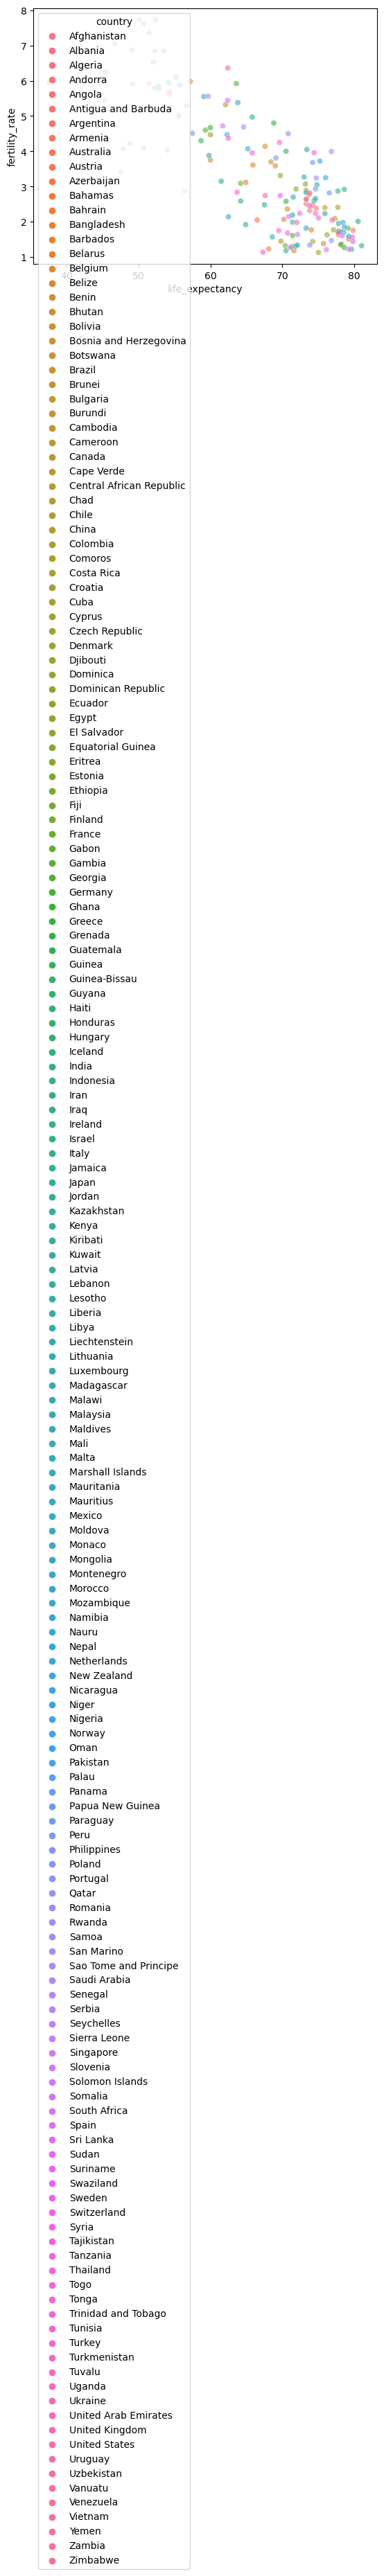

In [290]:
import seaborn as sns
import matplotlib.pyplot as plt

df_subset = df_all_merged.loc[df_all_merged['year'] == 2000]
sns.scatterplot(x='life_expectancy', y='fertility_rate', hue = 'country',
            data=df_subset, alpha=0.6)

In [305]:
df_all_merged[df_all_merged['year'].between(1960,2016)]

,country,year,life_expectancy,continent,fertility_rate,population
4375,Afghanistan,1960,31.94,Asia,7.67,8994793.0
4376,Albania,1960,62.87,Europe,6.19,1636054.0
4377,Algeria,1960,47.50,Africa,7.65,11124892.0
4378,Andorra,1960,NaN,Europe,NaN,13414.0
4379,Angola,1960,35.98,Africa,7.32,5270844.0
...,...,...,...,...,...,...
14170,Venezuela,2015,74.80,South America,2.34,31108083.0
14171,Vietnam,2015,75.40,Asia,1.70,93447601.0
14172,Yemen,2015,66.00,Asia,3.83,26832215.0
14173,Zambia,2015,56.70,Africa,5.59,16211767.0


In [306]:
df_all_merged[df_all_merged['year'].between(1960,2016)]['year'].unique()

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015], dtype=object)

In [424]:
years = df_all_merged[df_all_merged['year'].between(1960,2016)]['year'].unique()

for year in years:
    fig, axis = plt.subplots(figsize=(10,6))
    data_=df_all_merged[df_all_merged['year'] == year]
    sns.scatterplot(data=data_, x='fertility_rate', y='life_expectancy',  
                    alpha=0.6, 
                    size='population', sizes=(1,5000), 
                    hue='continent')
    handles, labels = axis.get_legend_handles_labels()

    axis.set_title(f'Correlation between fertility and life expectancy in {year}')
    axis.set_xlim(0, 10)
    axis.set_ylim(20, 90)
    axis.legend(handles=handles[:6], labels=labels[:6], loc='lower left', prop={'size': 9}, ncol=len(data_.columns))

    plt.savefig(f'lifeexp_{year}.png',dpi=300)
    plt.close()

In [425]:
pip install imageio

Note: you may need to restart the kernel to use updated packages.


In [426]:
import imageio.v2 as imageio

# create and save animated scatterplot

images = []

for i in range(1960, 2015):
    filename = 'lifeexp_{}.png'.format(i)
    images.append(imageio.imread(filename))

imageio.mimsave('animated_scatterplot.gif', images, fps=10)